In [1]:
%matplotlib inline

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
#load the dataset
boston = load_boston()
#turn it into pandas
bos = pd.DataFrame(boston.data, 
                   columns=boston.feature_names)
bos['PRICE'] = boston.target
# a dictionary for holding MSE
mse_dict = {}

In [21]:
#summary of the dataset
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

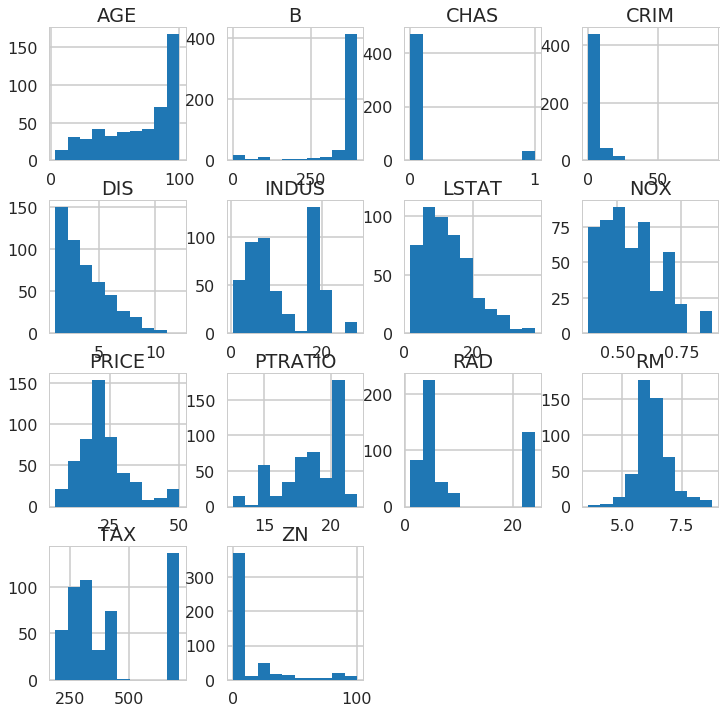

In [23]:
bos.hist(figsize=(12,12))
plt.show()

In [24]:
#set up the variables

X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']
print(X.shape, y.shape)

(506, 13) (506,)


In [25]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(339, 13) (339,)
(167, 13) (167,)


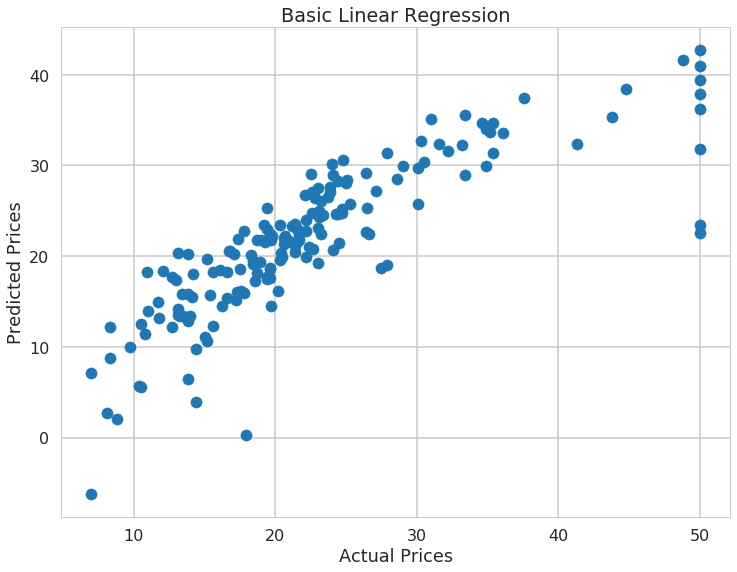

In [26]:
#going to do simple linear regression as the baseline for the more complicated methods
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model_y_hat = linear_model.predict(X_test)

plt.figure(figsize=(12,9))
plt.scatter(y_test, linear_model_y_hat)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Basic Linear Regression')
plt.show()


In [28]:
linear_model_mse = mean_squared_error(y_test, linear_model_y_hat)
mse_dict['Linear Regression'] = linear_model_mse
print('Linear Model MSE={:.2f}'.format(linear_model_mse))

Linear Model MSE=28.54
